## Creating a graph

In [2]:
'''
정의에 따르면, `Graph`는 식별된 노드의 쌍(edge, link, etc)과 함께 노드(vertices)의 모음입니다. 즉, 내부에는 노드와 엣지로 구성되어 있습니다. 
NetworkX에서 노드는 text, image, graph 등 모든 개체가 될 수 있습니다.

다만, Python의 `None`은 노드로 사용할 수 없습니다.
'''

import networkx as nx 

print(nx.__version__)

G = nx.Graph()

2.8.6


## Nodes

In [4]:
# Graph `G`에는 Node, edge 등 다양한 속성을 추가할 수 있습니다. 
G.add_node(1)

In [5]:
# List 형태로도 입력이 가능합니다.
G.add_nodes_from([2, 3])

In [7]:
'''
color가 red, green인 노드를 추가할 수 있습니다. 
여러가지 속성을 입력할 경우 `add_node` 대신, `add_nodes_from`을 사용하여야 합니다.
'''

G.add_nodes_from([
    (4, {'color':'red'}), 
    (5, {'color':'green'})
])

In [11]:
# Graph를 추가할 수도 있습니다.
H = nx.path_graph(10)
print(H) # Graph with 10 nodes and 9 edges 
G.add_nodes_from(H)


Graph with 10 nodes and 9 edges


## Edges 

In [12]:
# `G`는 Node 뿐만 아니라 Edge에 대해서도 동일하게 추가가 가능합니다.
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple 

G.add_edges_from([(1, 2), (1, 3)])

In [18]:
'''
edge에는 node와는 달리 weight를 지정해줄 수 있습니다. 
node에서 color를 입력하는 것과 마찬가지로 dictionary 구조로 weight를 입력할 수 있습니다.
'''

G.add_edges_from([(2, 3, {'weight':3.1415})])

G.add_edges_from(H.edges)

In [ ]:
# `clear` 함수를 이용하여 그래프를 초기화 할 수 있습니다. 
G.clear()

In [ ]:
'''
입력으로 text를 사용할 떄 `add_node`를 사용하면 하나의 단어로 인식해서 입력이 되지만, 
`add_nodes_from`을 사용할 경우 별개의 단어로 인식합니다. 
'''
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')


In [20]:
'''
DiGraph: `Graph`는 undirected graph이지만, `DiGraph`는 directed graph를 의미합니다.
`G.adj`, `G.successors`, `G.predecessors` 등 다양한 함수를 사용할 수 있습니다. 
'''

DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

## Examining elements of a graph 

In [24]:
'''
Graph에는 node, edge, adj, degree 등 다양한 속성들이 존재합니다. 
이는 `G.nodes`, `G.edge` 등의 형태로 조회가 가능합니다. 
'''

print(list(G.nodes))

print(list(G.edges))

print(list(G.adj[1])) # or list(G.neighbors(1))

G.degree[1] # the number of edges incident to 1 

[1, 2, 3, 4, 5, 0, 6, 7, 8, 9]
[(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[2, 3, 0]


3

In [28]:
# G.edges 안에 값을 입력하는 경우 해당하는 node의 edge를 가져올 수 있습니다.
G.edges([2, 3])

G.degree([2, 4])

DegreeView({2: 2, 4: 2})

## Removing elements from a graph 

In [ ]:
'''
node와 edge 등을 추가하는 방식과 유사한 방식으로 node와 edge를 제거할 수 있습니다. 
`Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()`, `Graph.remove_edges_from()`
Graph 내에 해당 노드가 없을 경우 error를 반환합니다. 
'''

G.remove_node(2)

G.remove_nodes_from('spam')

list(G.nodes)

G.remove_edge(1, 3)

## Using the graph constructors

In [ ]:
'''
위에서 다룬 방식처럼 `G.add_node` 등을 사용하여 점진적으로 그래프를 구축할 필요 없이, 
미리 값을 구축하고 입력으로 사용하여 그래프를 구축하여도 상관없습니다. 
'''

G.add_edge(1, 2)
H = nx.DiGraph(G)

list(H.edges())

edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)

adjacency_dict = {0:(1, 2), 1:(0, 2), 2:(0, 1)}
H = nx.Graph(adjacency_dict)

list(H.edges())

## Accessing edges and neighbors 

In [ ]:
G = nx.Graph([(1, 2, {'color':'yellow'})])
G[1] # same as G.adj[1]

G[1][2] # {'color':'yellow'}
G.edges[1, 2] # {'color':'yellow'}

In [ ]:
G.add_edge(1, 3)

G[1][3]['color'] = 'blue'

G.edges[1, 2]['color'] = 'red' 

G.edges[1, 2] # {'color':'red'}

In [34]:
FG = nx.Graph()

FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items(): # n = nodes, nbrs = neighbors
    for nbr, eattr in nbrs.items(): # nbr = nodes, eattr = edge attribute such as weight 
        wt = eattr['weight']
        if wt < 0.5 : print(f"{n}, {nbr}, {wt:.3}")

1, 2, 0.125
2, 1, 0.125
3, 4, 0.375
4, 3, 0.375


## Adding attribute to graphs, nodes, and edges 

In [35]:
# Graph attributes 
G = nx.Graph(day='Friday')
G.graph # {'day': 'Friday'}

# Or you can modify attributes later 
G.graph['day'] = 'Monday'
G.graph #  {'day': 'Monday'}

{'day': 'Friday'}

In [ ]:
# Node attributes 
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')

G.nodes[1] # {'time':'5pm'}
G.nodes[1]['room'] = 714 
G.nodes.data() # NodeDataView( {1: {'time':'5pm', 'room':714}, 3: {'time': '2pm'}})

In [36]:
# Edge attributes 
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color':'blue'}), (2, 3, {'weight':8})])

G[1][2]['weight'] = 4.7 
G.edges[3, 4]['weight'] = 4.2 

G.edges.data()
# EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red'})])

## Directed Graphs 

In [46]:
''' 
`DiGraph` 는 방향성이 있는 그래프를 의미합니다. 방향성이 있는 그래프이기 때문에 out_edges와 in_edges가 존재합니다.
'''

DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.degree(1, weight='weight')
list(DG.successors(1)) # A successor of n is a node m such that there exists a directed edge from n to m. 
list(DG.neighbors(1))

assert list(DG.successors(1)) == list(DG.neighbors(1))

In [47]:
H = nx.Graph(G) # create an undirected graph H from a directed graph G, or use `Graph.to_undirected`

## Multigraphs 

In [52]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight')) # {1: 1.25, 2: 1.75, 3: 0.5}

GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minvalue = min([d['weight'] for d in edict.values()])
        GG.add_edge(n, nbr, weight=minvalue)
nx.shortest_path(GG, 1, 3)

[1, 2, 3]

## Graph generator and graph operations 

1. Applying classic graph operations, such as:

- `subgraph`(G, nbunch): Returns the subgraph induced on nodes in nbunch.
- `union`(G, H[, rename, name]): Combine graphs G and H.
- `disjoint_union`(G, H): Combine graphs G and H.
- `cartesian_product`(G, H): Returns the Cartesian product of G and H. 
- `compose`(G, H): Compose graph G with H by combining nodes and edges into a single graph.
- `complement`(G): Returns the graph complements of G. 
- `create_empty_copy`(G[, with_data]): Returns a copy of the graph G with all of the edges removed. 
- `to_undirected`(graph): Returns an undirected view of the graph `graph`.
- `to_directed`(graph): Returns a directed view of the graph `graph`.

2. Using a call to one of the classic small graphs, e.g., 

- `petersen_graph`([create_using]): Returns the Petersen graph. 
- `tutte_graph`([create_using]): Returns the Tutte graph.
- `sedgewick_maze_graph`([create_using]): Return a small maze with a cycle. 
- `tetrahedral_graph`([create_using]): Returns the 3-regular Platonic Tetrahedral graph. 

3. Using a (constructive) generator for a classic graph, e.g., 

- `complete_graph`(n[, create_using]): Return the complete graph `K_n` with n nodes.
- `complete_bipartite_graph`(n1, n2[, create_using]): Returns the complete bipartite graph `K_{n_1, n_2}`. 
- `barbell_graph`(m1, m2[, create_using]): Returns the Barbell Graph: two complete graphs connected by a path.
- `lollipop_graph`(m, n[, create_using]): Returns the Lollipop Graph; `K_m` connected to `P_n`.

In [62]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20 )

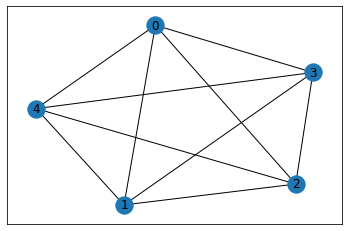

In [58]:
nx.draw_networkx(K_5)

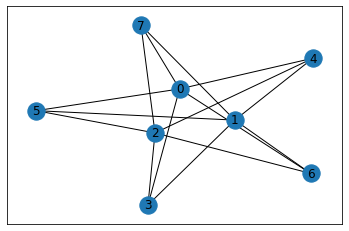

In [60]:
nx.draw_networkx(K_3_5)

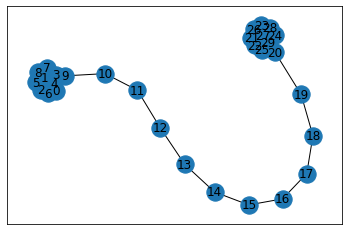

In [61]:
nx.draw_networkx(barbell)

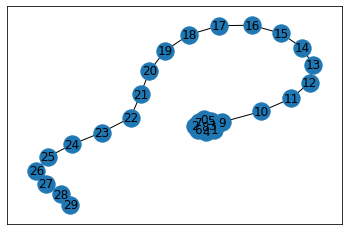

In [63]:
nx.draw_networkx(lollipop)

4. Using a stochastic graph generator, e.g., 

- `erdos_renyi_graph`(n, p[, seed, directed]): Returns a $G_{n, p}$ random graph, also known as an `Erdos-Renyi` graph or a binomial graph.
- `watts_strogatz_graph`(n, k, p[, seed]): Returns a `Watts-Strogatz` small-world graph.
- `barabasi_albert_graph`(n, m[, seed, ...]): Returns a random graph using `Barabasi-Albert` preferential attachment. 
- `random_lobster`(n, p1, p2[, seed]): Returns a random lobster graph. 

In [68]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

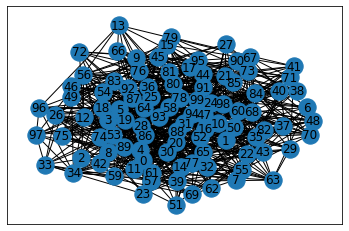

In [69]:
nx.draw_networkx(er)

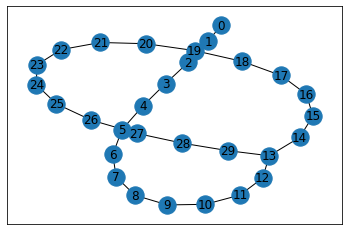

In [70]:
nx.draw_networkx(ws)

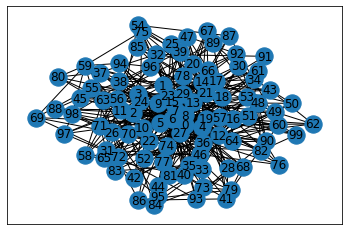

In [71]:
nx.draw_networkx(ba)

In [ ]:
nx.draw_networkx(red)

5. Reading a graph stored in a file using common graph formats

In [ ]:
nx.write_gml(red, 'path.to.file')
mygraph=nx.read_gml('path.to.file')

## Analyzing graphs 

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node('spam')
list(nx.connected_components(G)) # [{1, 2, 3}, {'spam'}]
sorted(d for n, d in G.degree())

nx.clustering(G) # {1:0, 2:0, 3:0, 'spam':0}

In [ ]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3] # {3: [3], 1: [3, 1], 2: [3, 1, 2]}

## Drawing graph 

In [73]:
import matplotlib.pyplot as plt 

%matplotlib inline 

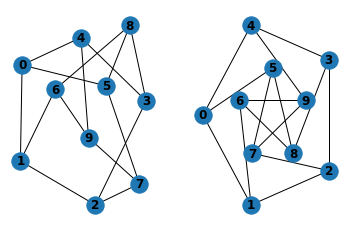

In [74]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

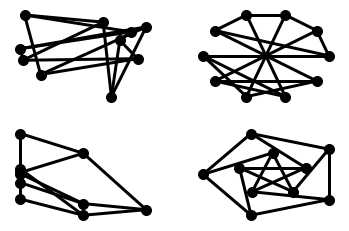

In [76]:
options = { 
           'node_color':'black', 
           'node_size': 100, 
           'width': 3}

subax1 = plt.subplot(221)
nx.draw_random(G, **options)

subax2 = plt.subplot(222)
nx.draw_circular(G, **options)

subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)

subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)

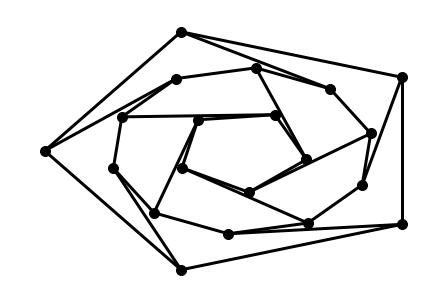

In [77]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

In [ ]:
nx.draw(G)
plt.savefig("path.png")

In [ ]:
''' 
`plt.savefig` 함수는 local directory에 `path.png`를 저장합니다. `Graphviz`나 `PyGraphviz` 등을 사용하는 경우, 
`networkx.drawing.nx_agraph.graphviz_layout` 를 사용하여 노드의 위치를 가져오는 것도 가능합니다. 
'''

from networkx.drawing.nx_agraph import write_dot

pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')